In [4]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
ssh_alias = 'transfer-gwdg'
data_path = '/usr/users/cidbn1/neurodyn/AlzheimerMice_Hayashi'

mouse = '555wt'
session = 34

In [76]:
tmp_path = "./tmp/behavior.txt"
bh_path = os.popen(f"ssh {ssh_alias} find {data_path}/{mouse}/Session{session:02}/a* -maxdepth 0 -type f").read()
cmd = f"rsync -av -e ssh {ssh_alias}:{bh_path[:-1]} {tmp_path} > /dev/null"
os.system(cmd)
data = pd.read_csv(tmp_path,sep='\t')

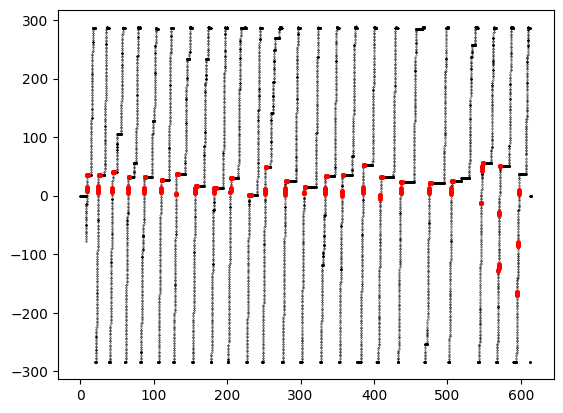

In [78]:
time = np.array(data['Time'])
loc = np.array(data['omegaY'])
reward = np.array(data['Reward'])>0.5

## shift @s=35

plt.figure()
plt.plot(time,loc,'k.',ms=0.5)
plt.plot(time[reward],loc[reward],'r.',ms=5)
plt.show()

/tmp/ipykernel_371111/559915269.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(ax,ylim=[0,10],xticklabels=np.linspace(-3,2,6))


[0.0,
 10.0,
 Text(-20.0, 0, '-3.0'),
 Text(0.0, 0, '-2.0'),
 Text(20.0, 0, '-1.0'),
 Text(40.0, 0, '0.0'),
 Text(60.0, 0, '1.0'),
 Text(80.0, 0, '2.0'),
 Text(100.0, 0, ''),
 Text(120.0, 0, '')]

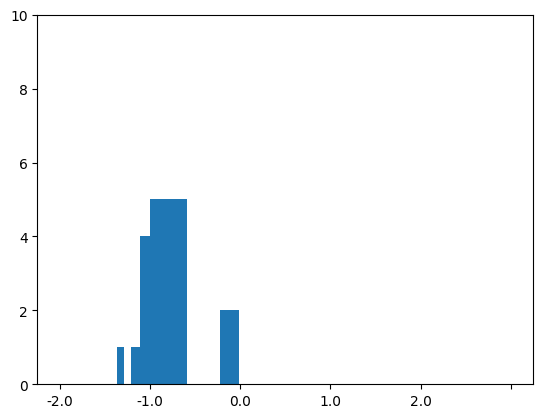

In [86]:
fig,ax = plt.subplots(1,1)
ax.hist(np.diff(time[reward]),bins=np.logspace(-3,2,101))
plt.setp(ax,ylim=[0,10],xticklabels=np.linspace(-3,2,6))